<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetMobile

## Step 1: Data Loading

In [2]:
import os
base_dir = 'C:\\Users\\limlo\\Downloads\\Deep Learning\\Assignment\\'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
img_size = 224

conv_base = NASNetMobile(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

## Step 2:  Develop the Image Classification Models

### Model #1

In [3]:
# Build the Model
# Resize all the images as 224*224 pixels
img_size = 224

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3))) #3 cause of RGB
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  
#Problem type is Multiclass: single-label classification

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
# Train the Model
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150*150    
        target_size=(img_size, img_size),
        batch_size=50,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')  #follow the loss function (categorical_crossentropy)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
#Check the shape for my data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 10)


In [8]:
history = model.fit(train_generator,
      steps_per_epoch=150,          #training_sample_size/data_batch_size = 7500/50
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40) #validation_sample_size/data_batch_size = 2000/50 

Epoch 1/100
150/150 [==============================] - 196s 1s/step - loss: 2.1472 - acc: 0.2176 - val_loss: 1.9804 - val_acc: 0.2835
Epoch 2/100
150/150 [==============================] - 197s 1s/step - loss: 1.9666 - acc: 0.3013 - val_loss: 1.8781 - val_acc: 0.3145
Epoch 3/100
150/150 [==============================] - 195s 1s/step - loss: 1.8823 - acc: 0.3283 - val_loss: 1.8026 - val_acc: 0.3540
Epoch 4/100
150/150 [==============================] - 189s 1s/step - loss: 1.8244 - acc: 0.3533 - val_loss: 1.7354 - val_acc: 0.3995
Epoch 5/100
150/150 [==============================] - 188s 1s/step - loss: 1.7726 - acc: 0.3757 - val_loss: 1.7743 - val_acc: 0.3745
Epoch 6/100
150/150 [==============================] - 187s 1s/step - loss: 1.7380 - acc: 0.3945 - val_loss: 1.7435 - val_acc: 0.3935
Epoch 7/100
150/150 [==============================] - 187s 1s/step - loss: 1.6990 - acc: 0.4097 - val_loss: 1.6865 - val_acc: 0.4200
Epoch 8/100
150/150 [==============================] - 187s 1s

Epoch 62/100
150/150 [==============================] - 192s 1s/step - loss: 0.9790 - acc: 0.6623 - val_loss: 1.2069 - val_acc: 0.6095
Epoch 63/100
150/150 [==============================] - 199s 1s/step - loss: 0.9813 - acc: 0.6589 - val_loss: 1.1638 - val_acc: 0.6120
Epoch 64/100
150/150 [==============================] - 200s 1s/step - loss: 0.9655 - acc: 0.6685 - val_loss: 1.1894 - val_acc: 0.6110
Epoch 65/100
150/150 [==============================] - 200s 1s/step - loss: 0.9670 - acc: 0.6752 - val_loss: 1.1628 - val_acc: 0.6205
Epoch 66/100
150/150 [==============================] - 205s 1s/step - loss: 0.9590 - acc: 0.6693 - val_loss: 1.1211 - val_acc: 0.6310
Epoch 67/100
150/150 [==============================] - 212s 1s/step - loss: 0.9564 - acc: 0.6729 - val_loss: 1.1075 - val_acc: 0.6400
Epoch 68/100
150/150 [==============================] - 211s 1s/step - loss: 0.9396 - acc: 0.6708 - val_loss: 1.1701 - val_acc: 0.6235
Epoch 69/100
150/150 [==============================] -

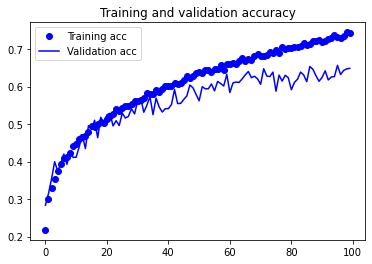

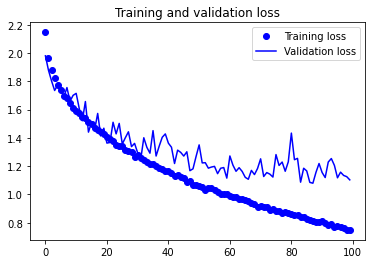

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments
The model had an accuracy of about 64%. Looking at the validaion loss, the model seem to begin to overfit at around the 85-90 epoch.

In [11]:
# Save the Model
model.save('food_model_1.h5')

In [3]:
#building another model
img_size = 224

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2*1e-4),
              metrics=['acc'])

In [6]:
# Train the Model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
#Check the shape for my data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 10)


In [8]:
history = model.fit(train_generator,
      steps_per_epoch=150,         
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 191s 1s/step - loss: 2.2369 - acc: 0.1716 - val_loss: 2.0961 - val_acc: 0.2440
Epoch 2/100
150/150 [==============================] - 178s 1s/step - loss: 2.0584 - acc: 0.2696 - val_loss: 1.9666 - val_acc: 0.2730
Epoch 3/100
150/150 [==============================] - 184s 1s/step - loss: 1.9684 - acc: 0.3001 - val_loss: 1.9425 - val_acc: 0.3050
Epoch 4/100
150/150 [==============================] - 189s 1s/step - loss: 1.8928 - acc: 0.3309 - val_loss: 1.7800 - val_acc: 0.3895
Epoch 5/100
150/150 [==============================] - 190s 1s/step - loss: 1.8559 - acc: 0.3429 - val_loss: 1.7867 - val_acc: 0.3810
Epoch 6/100
150/150 [==============================] - 191s 1s/step - loss: 1.8042 - acc: 0.3609 - val_loss: 2.1433 - val_acc: 0.3190
Epoch 7/100
150/150 [==============================] - 190s 1s/step - loss: 1.7745 - acc: 0.3840 - val_loss: 1.6566 - val_acc: 0.4260
Epoch 8/100
150/150 [==============================] - 189s 1s

Epoch 62/100
150/150 [==============================] - 192s 1s/step - loss: 1.1375 - acc: 0.6152 - val_loss: 1.2703 - val_acc: 0.6335
Epoch 63/100
150/150 [==============================] - 192s 1s/step - loss: 1.1187 - acc: 0.6168 - val_loss: 1.2455 - val_acc: 0.6270
Epoch 64/100
150/150 [==============================] - 188s 1s/step - loss: 1.1254 - acc: 0.6173 - val_loss: 1.2404 - val_acc: 0.6185
Epoch 65/100
150/150 [==============================] - 189s 1s/step - loss: 1.1125 - acc: 0.6261 - val_loss: 1.2152 - val_acc: 0.6355
Epoch 66/100
150/150 [==============================] - 189s 1s/step - loss: 1.1013 - acc: 0.6209 - val_loss: 1.2134 - val_acc: 0.6240
Epoch 67/100
150/150 [==============================] - 189s 1s/step - loss: 1.1011 - acc: 0.6261 - val_loss: 1.0835 - val_acc: 0.6360
Epoch 68/100
150/150 [==============================] - 200s 1s/step - loss: 1.1030 - acc: 0.6335 - val_loss: 1.2379 - val_acc: 0.6055
Epoch 69/100
150/150 [==============================] -

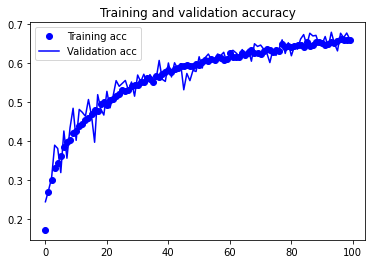

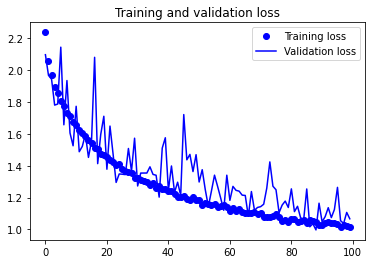

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments
The model reached an training accuracy of about 65%. The training accuracy and validation accuracy lines are close to one another.
Looking at the training and validation loss, the lines are close to one another as well. However, looking at the overall trend of the validation loss, it seems that it is still decreasing suggesting that my model is underfitted. Furthermore, the validation is noisier as well. 

In [10]:
# Save the Model
model.save('food_model_2.h5')

In [5]:
#building another model
img_size = 224

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)      

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2*1e-4),
              metrics=['acc'])

In [8]:
# Train the Model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [9]:
#Check the shape for my data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 10)


In [10]:
history = model.fit(train_generator,
      steps_per_epoch=150,          
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40) 

Epoch 1/100
150/150 [==============================] - 87s 549ms/step - loss: 2.1843 - acc: 0.1861 - val_loss: 2.0550 - val_acc: 0.2510
Epoch 2/100
150/150 [==============================] - 82s 548ms/step - loss: 2.0166 - acc: 0.2707 - val_loss: 1.9683 - val_acc: 0.3080
Epoch 3/100
150/150 [==============================] - 78s 519ms/step - loss: 1.9558 - acc: 0.3032 - val_loss: 2.1357 - val_acc: 0.2695
Epoch 4/100
150/150 [==============================] - 75s 502ms/step - loss: 1.8662 - acc: 0.3417 - val_loss: 1.9080 - val_acc: 0.3265
Epoch 5/100
150/150 [==============================] - 75s 502ms/step - loss: 1.8167 - acc: 0.3615 - val_loss: 1.8252 - val_acc: 0.3650
Epoch 6/100
150/150 [==============================] - 76s 504ms/step - loss: 1.7657 - acc: 0.3773 - val_loss: 1.7139 - val_acc: 0.3910
Epoch 7/100
150/150 [==============================] - 75s 502ms/step - loss: 1.7113 - acc: 0.3944 - val_loss: 1.6469 - val_acc: 0.4165
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 77s 516ms/step - loss: 0.7258 - acc: 0.7413 - val_loss: 1.3731 - val_acc: 0.6215
Epoch 62/100
150/150 [==============================] - 78s 517ms/step - loss: 0.7223 - acc: 0.7452 - val_loss: 1.3392 - val_acc: 0.6180
Epoch 63/100
150/150 [==============================] - 77s 515ms/step - loss: 0.7092 - acc: 0.7568 - val_loss: 1.3884 - val_acc: 0.6230
Epoch 64/100
150/150 [==============================] - 81s 542ms/step - loss: 0.6981 - acc: 0.7520 - val_loss: 1.4633 - val_acc: 0.6105
Epoch 65/100
150/150 [==============================] - 78s 517ms/step - loss: 0.6980 - acc: 0.7549 - val_loss: 1.4781 - val_acc: 0.6260
Epoch 66/100
150/150 [==============================] - 79s 523ms/step - loss: 0.6899 - acc: 0.7604 - val_loss: 1.4207 - val_acc: 0.6185
Epoch 67/100
150/150 [==============================] - 77s 510ms/step - loss: 0.6649 - acc: 0.7720 - val_loss: 1.4027 - val_acc: 0.6295
Epoch 68/100
150/150 [===================

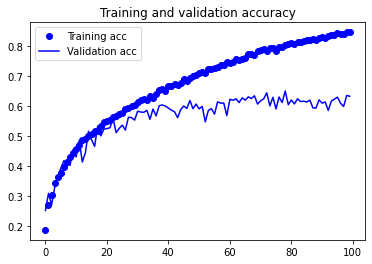

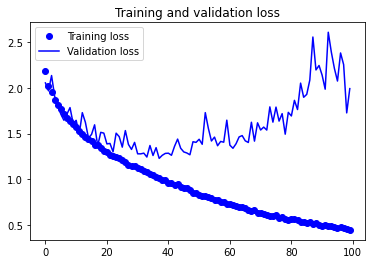

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
# Save the Model
model.save('food_model_3.h5')

# Comments
My model managed to reach an accuracy of about 85%. Sadly, my model reached a validation accuracy of 60%, which is a huge difference compared to training accuracy. It seemed that my model has overfitted at around the 40th epoch. At around the 80th to 100th epoch the model's validation loss was noisier. 

In [3]:
#building another model
img_size = 224

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2*1e-4),
              metrics=['acc'])

In [6]:
# Train the Model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
#Check the shape for my data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 10)


In [8]:
history = model.fit(train_generator,
      steps_per_epoch=150,         
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40) 

Epoch 1/100
150/150 [==============================] - 105s 584ms/step - loss: 2.2800 - acc: 0.1367 - val_loss: 2.2144 - val_acc: 0.1870
Epoch 2/100
150/150 [==============================] - 74s 491ms/step - loss: 2.1728 - acc: 0.2015 - val_loss: 2.0815 - val_acc: 0.2595
Epoch 3/100
150/150 [==============================] - 74s 493ms/step - loss: 2.0786 - acc: 0.2444 - val_loss: 2.0149 - val_acc: 0.2635
Epoch 4/100
150/150 [==============================] - 75s 496ms/step - loss: 2.0219 - acc: 0.2735 - val_loss: 1.9855 - val_acc: 0.2785
Epoch 5/100
150/150 [==============================] - 75s 496ms/step - loss: 1.9753 - acc: 0.2995 - val_loss: 1.8898 - val_acc: 0.3375
Epoch 6/100
150/150 [==============================] - 74s 495ms/step - loss: 1.9160 - acc: 0.3264 - val_loss: 1.8803 - val_acc: 0.3415
Epoch 7/100
150/150 [==============================] - 75s 497ms/step - loss: 1.8851 - acc: 0.3363 - val_loss: 1.9321 - val_acc: 0.3350
Epoch 8/100
150/150 [==========================

Epoch 61/100
150/150 [==============================] - 74s 492ms/step - loss: 0.9631 - acc: 0.6772 - val_loss: 1.2741 - val_acc: 0.6065
Epoch 62/100
150/150 [==============================] - 74s 491ms/step - loss: 0.9405 - acc: 0.6815 - val_loss: 1.2537 - val_acc: 0.6020
Epoch 63/100
150/150 [==============================] - 74s 490ms/step - loss: 0.9513 - acc: 0.6769 - val_loss: 1.5111 - val_acc: 0.5860
Epoch 64/100
150/150 [==============================] - 74s 490ms/step - loss: 0.9490 - acc: 0.6861 - val_loss: 1.1552 - val_acc: 0.6370
Epoch 65/100
150/150 [==============================] - 74s 490ms/step - loss: 0.9340 - acc: 0.6913 - val_loss: 1.1702 - val_acc: 0.6230
Epoch 66/100
150/150 [==============================] - 73s 489ms/step - loss: 0.9263 - acc: 0.6857 - val_loss: 1.2134 - val_acc: 0.6200
Epoch 67/100
150/150 [==============================] - 75s 497ms/step - loss: 0.9194 - acc: 0.6936 - val_loss: 1.5516 - val_acc: 0.5825
Epoch 68/100
150/150 [===================

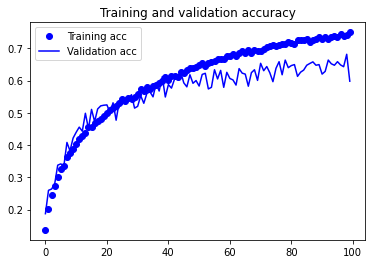

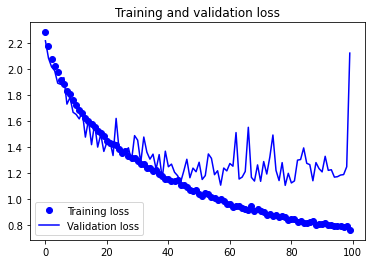

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
model.save('food_model_4.h5')

# Comments
My model reached an accuracy of about 73%, with a validation accuracy of 62%. Looking at the validaion loss, it seems that my model had overfitted at around the 80th epoch. The model was also noisier at around the 60th epoch. 

In [12]:
#building another model
img_size = 224

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)      

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2*1e-4),
              metrics=['acc'])

In [15]:
# Train the Model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,

        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [16]:
#Check the shape for my data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 10)


In [17]:
history = model.fit(train_generator,
      steps_per_epoch=150,          
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 78s 512ms/step - loss: 7.2448 - acc: 0.1085 - val_loss: 4.7131 - val_acc: 0.1445
Epoch 2/100
150/150 [==============================] - 75s 502ms/step - loss: 3.6390 - acc: 0.1745 - val_loss: 2.9143 - val_acc: 0.2325
Epoch 3/100
150/150 [==============================] - 80s 535ms/step - loss: 2.7040 - acc: 0.2148 - val_loss: 2.4983 - val_acc: 0.2475
Epoch 4/100
150/150 [==============================] - 80s 533ms/step - loss: 2.4432 - acc: 0.2468 - val_loss: 2.3637 - val_acc: 0.2365
Epoch 5/100
150/150 [==============================] - 79s 524ms/step - loss: 2.3013 - acc: 0.2628 - val_loss: 2.2030 - val_acc: 0.2875
Epoch 6/100
150/150 [==============================] - 78s 519ms/step - loss: 2.1994 - acc: 0.2876 - val_loss: 2.0972 - val_acc: 0.3235
Epoch 7/100
150/150 [==============================] - 78s 522ms/step - loss: 2.1252 - acc: 0.3037 - val_loss: 2.0550 - val_acc: 0.3080
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 83s 552ms/step - loss: 1.2583 - acc: 0.6080 - val_loss: 1.3590 - val_acc: 0.5740
Epoch 62/100
150/150 [==============================] - 82s 549ms/step - loss: 1.2520 - acc: 0.6108 - val_loss: 1.3097 - val_acc: 0.5960
Epoch 63/100
150/150 [==============================] - 82s 545ms/step - loss: 1.2452 - acc: 0.6160 - val_loss: 1.3452 - val_acc: 0.5915
Epoch 64/100
150/150 [==============================] - 79s 528ms/step - loss: 1.2437 - acc: 0.6143 - val_loss: 1.2972 - val_acc: 0.5945
Epoch 65/100
150/150 [==============================] - 80s 534ms/step - loss: 1.2289 - acc: 0.6203 - val_loss: 1.2675 - val_acc: 0.6155
Epoch 66/100
150/150 [==============================] - 82s 543ms/step - loss: 1.2137 - acc: 0.6251 - val_loss: 1.2904 - val_acc: 0.5985
Epoch 67/100
150/150 [==============================] - 80s 535ms/step - loss: 1.1994 - acc: 0.6332 - val_loss: 1.5756 - val_acc: 0.5345
Epoch 68/100
150/150 [===================

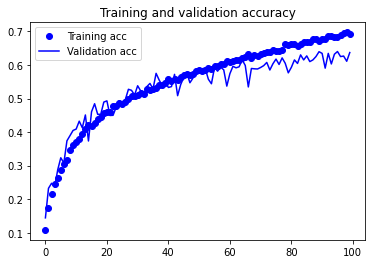

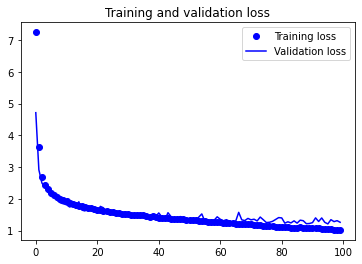

In [18]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save the Model
model.save('food_model_5.h5')

# Comments

My model managed to reach an accuracy of about 65%. For both the training and validation loss, the lines are following one another very closely. At around the 80th to 90th epoch, I can see the line of the validation loss starting to diverge away from the training loss. It seems that the model is beginning to overfit at around the 80th to 90th epoch. 

In [3]:
#building another model
img_size = 224

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2*1e-4),
              metrics=['acc'])

In [6]:
# Train the Model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
#Check the shape for my data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 10)


In [8]:
history = model.fit(train_generator,
      steps_per_epoch=150,          
      epochs=150,
      validation_data=validation_generator,
      validation_steps=40) 

Epoch 1/150
150/150 [==============================] - 92s 542ms/step - loss: 7.2702 - acc: 0.1233 - val_loss: 4.8717 - val_acc: 0.1750
Epoch 2/150
150/150 [==============================] - 75s 498ms/step - loss: 3.7808 - acc: 0.1805 - val_loss: 2.9925 - val_acc: 0.2190
Epoch 3/150
150/150 [==============================] - 75s 497ms/step - loss: 2.7628 - acc: 0.2332 - val_loss: 2.5325 - val_acc: 0.2725
Epoch 4/150
150/150 [==============================] - 80s 535ms/step - loss: 2.4936 - acc: 0.2595 - val_loss: 2.4593 - val_acc: 0.2420
Epoch 5/150
150/150 [==============================] - 75s 502ms/step - loss: 2.3275 - acc: 0.2800 - val_loss: 2.2485 - val_acc: 0.3120
Epoch 6/150
150/150 [==============================] - 75s 499ms/step - loss: 2.2218 - acc: 0.2973 - val_loss: 2.1571 - val_acc: 0.3100
Epoch 7/150
150/150 [==============================] - 75s 499ms/step - loss: 2.1477 - acc: 0.3131 - val_loss: 2.0188 - val_acc: 0.3700
Epoch 8/150
150/150 [===========================

Epoch 61/150
150/150 [==============================] - 74s 493ms/step - loss: 1.2633 - acc: 0.6075 - val_loss: 1.4081 - val_acc: 0.5725
Epoch 62/150
150/150 [==============================] - 74s 492ms/step - loss: 1.2375 - acc: 0.6077 - val_loss: 1.3154 - val_acc: 0.5845
Epoch 63/150
150/150 [==============================] - 74s 492ms/step - loss: 1.2526 - acc: 0.6161 - val_loss: 1.4432 - val_acc: 0.5705
Epoch 64/150
150/150 [==============================] - 74s 492ms/step - loss: 1.2306 - acc: 0.6188 - val_loss: 1.3219 - val_acc: 0.5905
Epoch 65/150
150/150 [==============================] - 74s 492ms/step - loss: 1.2334 - acc: 0.6124 - val_loss: 1.3393 - val_acc: 0.5965
Epoch 66/150
150/150 [==============================] - 75s 497ms/step - loss: 1.2231 - acc: 0.6259 - val_loss: 1.4237 - val_acc: 0.5710
Epoch 67/150
150/150 [==============================] - 74s 492ms/step - loss: 1.2116 - acc: 0.6281 - val_loss: 1.4595 - val_acc: 0.5780
Epoch 68/150
150/150 [===================

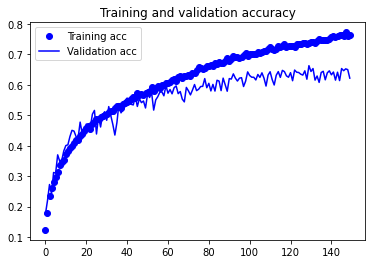

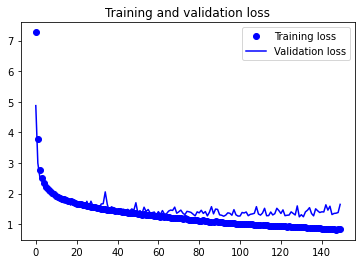

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
model.save('food_model_6.h5')

# Comments

This model is used to check whether my 5th model ran earlier was in the optimal range. Looking at the training and validation loss, it would be safe to say that my model starts to overfit at around the 80th to 100th epoch as the overall trend of the validation loss is starting to increase. As such, my 5th model was in the optimal range, and is a good fit model. 

### Model #2

In [3]:
img_size = 224

conv_base = NASNetMobile(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))


In [8]:
conv_base.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                            

                                                                                                  
 separable_conv_1_pad_reduction  (None, 115, 115, 32  0          ['activation_195[0][0]']         
 _right3_stem_1 (ZeroPadding2D)  )                                                                
                                                                                                  
 activation_197 (Activation)    (None, 56, 56, 11)   0           ['reduction_add_1_stem_1[0][0]'] 
                                                                                                  
 separable_conv_1_bn_reduction_  (None, 56, 56, 11)  44          ['separable_conv_1_reduction_righ
 right2_stem_1 (BatchNormalizat                                  t2_stem_1[0][0]']                
 ion)                                                                                             
                                                                                                  
 separable

 add_4 (Add)                    (None, 56, 56, 11)   0           ['reduction_add_2_stem_1[0][0]', 
                                                                  'reduction_left4_stem_1[0][0]'] 
                                                                                                  
 reduction_add4_stem_1 (Add)    (None, 56, 56, 11)   0           ['separable_conv_2_bn_reduction_l
                                                                 eft4_stem_1[0][0]',              
                                                                  'reduction_right5_stem_1[0][0]']
                                                                                                  
 cropping2d_4 (Cropping2D)      (None, 111, 111, 32  0           ['zero_padding2d_4[0][0]']       
                                )                                                                 
                                                                                                  
 reduction

 separable_conv_2_bn_reduction_  (None, 28, 28, 22)  88          ['separable_conv_2_reduction_righ
 right1_stem_2 (BatchNormalizat                                  t1_stem_2[0][0]']                
 ion)                                                                                             
                                                                                                  
 separable_conv_1_pad_reduction  (None, 61, 61, 22)  0           ['activation_204[0][0]']         
 _right2_stem_2 (ZeroPadding2D)                                                                   
                                                                                                  
 activation_206 (Activation)    (None, 56, 56, 22)   0           ['adjust_bn_stem_2[0][0]']       
                                                                                                  
 reduction_add_1_stem_2 (Add)   (None, 28, 28, 22)   0           ['separable_conv_2_bn_reduction_l
          

                                                                                                  
 separable_conv_2_bn_reduction_  (None, 28, 28, 22)  88          ['separable_conv_2_reduction_left
 left4_stem_2 (BatchNormalizati                                  4_stem_2[0][0]']                 
 on)                                                                                              
                                                                                                  
 reduction_right5_stem_2 (MaxPo  (None, 28, 28, 22)  0           ['reduction_pad_1_stem_2[0][0]'] 
 oling2D)                                                                                         
                                                                                                  
 zero_padding2d_5 (ZeroPadding2  (None, 57, 57, 44)  0           ['adjust_relu_1_0[0][0]']        
 D)                                                                                               
          

 separable_conv_1_bn_normal_lef  (None, 28, 28, 44)  176         ['separable_conv_1_normal_left2_0
 t2_0 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_1_bn_normal_rig  (None, 28, 28, 44)  176         ['separable_conv_1_normal_right2_
 ht2_0 (BatchNormalization)                                      0[0][0]']                        
                                                                                                  
 separable_conv_1_bn_normal_lef  (None, 28, 28, 44)  176         ['separable_conv_1_normal_left5_0
 t5_0 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 activation_212 (Activation)    (None, 28, 28, 44)   0           ['separable_conv_1_bn_normal_left
          

 normal_concat_0 (Concatenate)  (None, 28, 28, 264)  0           ['adjust_bn_0[0][0]',            
                                                                  'normal_add_1_0[0][0]',         
                                                                  'normal_add_2_0[0][0]',         
                                                                  'normal_add_3_0[0][0]',         
                                                                  'normal_add_4_0[0][0]',         
                                                                  'normal_add_5_0[0][0]']         
                                                                                                  
 activation_221 (Activation)    (None, 28, 28, 88)   0           ['reduction_concat_stem_2[0][0]']
                                                                                                  
 activation_222 (Activation)    (None, 28, 28, 264)  0           ['normal_concat_0[0][0]']        
          

 separable_conv_2_normal_left2_  (None, 28, 28, 44)  3036        ['activation_228[0][0]']         
 1 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_2_normal_right2  (None, 28, 28, 44)  2332        ['activation_230[0][0]']         
 _1 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_2_normal_left5_  (None, 28, 28, 44)  2332        ['activation_232[0][0]']         
 1 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 28, 28, 44)  176         ['separable_conv_2_normal_left1_1
 t1_1 (Bat

 activation_243 (Activation)    (None, 28, 28, 44)   0           ['normal_bn_1_2[0][0]']          
                                                                                                  
 separable_conv_1_normal_left1_  (None, 28, 28, 44)  3036        ['activation_235[0][0]']         
 2 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_1_normal_right1  (None, 28, 28, 44)  2332        ['activation_237[0][0]']         
 _2 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_1_normal_left2_  (None, 28, 28, 44)  3036        ['activation_239[0][0]']         
 2 (SeparableConv2D)                                                                              
          

 separable_conv_2_bn_normal_lef  (None, 28, 28, 44)  176         ['separable_conv_2_normal_left5_2
 t5_2 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 normal_add_1_2 (Add)           (None, 28, 28, 44)   0           ['separable_conv_2_bn_normal_left
                                                                 1_2[0][0]',                      
                                                                  'separable_conv_2_bn_normal_righ
                                                                 t1_2[0][0]']                     
                                                                                                  
 normal_add_2_2 (Add)           (None, 28, 28, 44)   0           ['separable_conv_2_bn_normal_left
                                                                 2_2[0][0]',                      
          

 t5_3 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 activation_248 (Activation)    (None, 28, 28, 44)   0           ['separable_conv_1_bn_normal_left
                                                                 1_3[0][0]']                      
                                                                                                  
 activation_250 (Activation)    (None, 28, 28, 44)   0           ['separable_conv_1_bn_normal_righ
                                                                 t1_3[0][0]']                     
                                                                                                  
 activation_252 (Activation)    (None, 28, 28, 44)   0           ['separable_conv_1_bn_normal_left
                                                                 2_3[0][0]']                      
          

 activation_258 (Activation)    (None, 28, 28, 264)  0           ['normal_concat_3[0][0]']        
                                                                                                  
 activation_257 (Activation)    (None, 28, 28, 264)  0           ['normal_concat_2[0][0]']        
                                                                                                  
 reduction_conv_1_reduce_4 (Con  (None, 28, 28, 88)  23232       ['activation_258[0][0]']         
 v2D)                                                                                             
                                                                                                  
 adjust_conv_projection_reduce_  (None, 28, 28, 88)  23232       ['activation_257[0][0]']         
 4 (Conv2D)                                                                                       
                                                                                                  
 reduction

                                                                 ]                                
                                                                                                  
 separable_conv_1_bn_reduction_  (None, 14, 14, 88)  352         ['separable_conv_1_reduction_righ
 right2_reduce_4 (BatchNormaliz                                  t2_reduce_4[0][0]']              
 ation)                                                                                           
                                                                                                  
 separable_conv_1_reduction_rig  (None, 14, 14, 88)  9944        ['separable_conv_1_pad_reduction_
 ht3_reduce_4 (SeparableConv2D)                                  right3_reduce_4[0][0]']          
                                                                                                  
 separable_conv_1_reduction_lef  (None, 14, 14, 88)  8536        ['activation_267[0][0]']         
 t4_reduce

                                                                 eft4_reduce_4[0][0]',            
                                                                  'reduction_right5_reduce_4[0][0]
                                                                 ']                               
                                                                                                  
 cropping2d_6 (Cropping2D)      (None, 28, 28, 264)  0           ['zero_padding2d_6[0][0]']       
                                                                                                  
 reduction_concat_reduce_4 (Con  (None, 14, 14, 352)  0          ['reduction_add_2_reduce_4[0][0]'
 catenate)                                                       , 'reduction_add3_reduce_4[0][0]'
                                                                 , 'add_6[0][0]',                 
                                                                  'reduction_add4_reduce_4[0][0]']
          

                                                                                                  
 activation_277 (Activation)    (None, 14, 14, 88)   0           ['separable_conv_1_bn_normal_righ
                                                                 t2_5[0][0]']                     
                                                                                                  
 activation_279 (Activation)    (None, 14, 14, 88)   0           ['separable_conv_1_bn_normal_left
                                                                 5_5[0][0]']                      
                                                                                                  
 separable_conv_2_normal_left1_  (None, 14, 14, 88)  9944        ['activation_271[0][0]']         
 5 (SeparableConv2D)                                                                              
                                                                                                  
 separable

 adjust_bn_6 (BatchNormalizatio  (None, 14, 14, 88)  352         ['adjust_conv_projection_6[0][0]'
 n)                                                              ]                                
                                                                                                  
 normal_bn_1_6 (BatchNormalizat  (None, 14, 14, 88)  352         ['normal_conv_1_6[0][0]']        
 ion)                                                                                             
                                                                                                  
 activation_282 (Activation)    (None, 14, 14, 88)   0           ['normal_bn_1_6[0][0]']          
                                                                                                  
 activation_284 (Activation)    (None, 14, 14, 88)   0           ['adjust_bn_6[0][0]']            
                                                                                                  
 activatio

 t2_6 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 14, 14, 88)  352         ['separable_conv_2_normal_right2_
 ht2_6 (BatchNormalization)                                      6[0][0]']                        
                                                                                                  
 normal_left3_6 (AveragePooling  (None, 14, 14, 88)  0           ['normal_bn_1_6[0][0]']          
 2D)                                                                                              
                                                                                                  
 normal_left4_6 (AveragePooling  (None, 14, 14, 88)  0           ['adjust_bn_6[0][0]']            
 2D)                                                                                              
          

                                                                                                  
 separable_conv_1_bn_normal_lef  (None, 14, 14, 88)  352         ['separable_conv_1_normal_left1_7
 t1_7 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_1_bn_normal_rig  (None, 14, 14, 88)  352         ['separable_conv_1_normal_right1_
 ht1_7 (BatchNormalization)                                      7[0][0]']                        
                                                                                                  
 separable_conv_1_bn_normal_lef  (None, 14, 14, 88)  352         ['separable_conv_1_normal_left2_7
 t2_7 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable

 normal_add_4_7 (Add)           (None, 14, 14, 88)   0           ['normal_left4_7[0][0]',         
                                                                  'normal_right4_7[0][0]']        
                                                                                                  
 normal_add_5_7 (Add)           (None, 14, 14, 88)   0           ['separable_conv_2_bn_normal_left
                                                                 5_7[0][0]',                      
                                                                  'normal_bn_1_7[0][0]']          
                                                                                                  
 normal_concat_7 (Concatenate)  (None, 14, 14, 528)  0           ['adjust_bn_7[0][0]',            
                                                                  'normal_add_1_7[0][0]',         
                                                                  'normal_add_2_7[0][0]',         
          

                                                                                                  
 separable_conv_2_normal_left1_  (None, 14, 14, 88)  9944        ['activation_307[0][0]']         
 8 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_2_normal_right1  (None, 14, 14, 88)  8536        ['activation_309[0][0]']         
 _8 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_2_normal_left2_  (None, 14, 14, 88)  9944        ['activation_311[0][0]']         
 8 (SeparableConv2D)                                                                              
                                                                                                  
 separable

 activation_318 (Activation)    (None, 14, 14, 176)  0           ['reduction_bn_1_reduce_8[0][0]']
                                                                                                  
 activation_320 (Activation)    (None, 14, 14, 176)  0           ['adjust_bn_reduce_8[0][0]']     
                                                                                                  
 separable_conv_1_pad_reduction  (None, 17, 17, 176)  0          ['activation_318[0][0]']         
 _left1_reduce_8 (ZeroPadding2D                                                                   
 )                                                                                                
                                                                                                  
 separable_conv_1_pad_reduction  (None, 19, 19, 176)  0          ['activation_320[0][0]']         
 _right1_reduce_8 (ZeroPadding2                                                                   
 D)       

 right3_reduce_8 (BatchNormaliz                                  t3_reduce_8[0][0]']              
 ation)                                                                                           
                                                                                                  
 separable_conv_1_bn_reduction_  (None, 7, 7, 176)   704         ['separable_conv_1_reduction_left
 left4_reduce_8 (BatchNormaliza                                  4_reduce_8[0][0]']               
 tion)                                                                                            
                                                                                                  
 reduction_pad_1_reduce_8 (Zero  (None, 15, 15, 176)  0          ['reduction_bn_1_reduce_8[0][0]']
 Padding2D)                                                                                       
                                                                                                  
 separable

                                                                                                  
 adjust_conv_1_9 (Conv2D)       (None, 7, 7, 88)     46464       ['adjust_avg_pool_1_9[0][0]']    
                                                                                                  
 adjust_conv_2_9 (Conv2D)       (None, 7, 7, 88)     46464       ['adjust_avg_pool_2_9[0][0]']    
                                                                                                  
 activation_328 (Activation)    (None, 7, 7, 704)    0           ['reduction_concat_reduce_8[0][0]
                                                                 ']                               
                                                                                                  
 concatenate_7 (Concatenate)    (None, 7, 7, 176)    0           ['adjust_conv_1_9[0][0]',        
                                                                  'adjust_conv_2_9[0][0]']        
          

 separable_conv_2_normal_right2  (None, 7, 7, 176)   32560       ['activation_336[0][0]']         
 _9 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_2_normal_left5_  (None, 7, 7, 176)   32560       ['activation_338[0][0]']         
 9 (SeparableConv2D)                                                                              
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 7, 7, 176)   704         ['separable_conv_2_normal_left1_9
 t1_9 (BatchNormalization)                                       [0][0]']                         
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 7, 7, 176)   704         ['separable_conv_2_normal_right1_
 ht1_9 (Ba

 separable_conv_1_normal_left1_  (None, 7, 7, 176)   35376       ['activation_341[0][0]']         
 10 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_1_normal_right1  (None, 7, 7, 176)   32560       ['activation_343[0][0]']         
 _10 (SeparableConv2D)                                                                            
                                                                                                  
 separable_conv_1_normal_left2_  (None, 7, 7, 176)   35376       ['activation_345[0][0]']         
 10 (SeparableConv2D)                                                                             
                                                                                                  
 separable_conv_1_normal_right2  (None, 7, 7, 176)   32560       ['activation_347[0][0]']         
 _10 (Sepa

                                                                                                  
 normal_add_1_10 (Add)          (None, 7, 7, 176)    0           ['separable_conv_2_bn_normal_left
                                                                 1_10[0][0]',                     
                                                                  'separable_conv_2_bn_normal_righ
                                                                 t1_10[0][0]']                    
                                                                                                  
 normal_add_2_10 (Add)          (None, 7, 7, 176)    0           ['separable_conv_2_bn_normal_left
                                                                 2_10[0][0]',                     
                                                                  'separable_conv_2_bn_normal_righ
                                                                 t2_10[0][0]']                    
          

 activation_354 (Activation)    (None, 7, 7, 176)    0           ['separable_conv_1_bn_normal_left
                                                                 1_11[0][0]']                     
                                                                                                  
 activation_356 (Activation)    (None, 7, 7, 176)    0           ['separable_conv_1_bn_normal_righ
                                                                 t1_11[0][0]']                    
                                                                                                  
 activation_358 (Activation)    (None, 7, 7, 176)    0           ['separable_conv_1_bn_normal_left
                                                                 2_11[0][0]']                     
                                                                                                  
 activation_360 (Activation)    (None, 7, 7, 176)    0           ['separable_conv_1_bn_normal_righ
          

 activation_364 (Activation)    (None, 7, 7, 1056)   0           ['normal_concat_11[0][0]']       
                                                                                                  
 adjust_conv_projection_12 (Con  (None, 7, 7, 176)   185856      ['activation_363[0][0]']         
 v2D)                                                                                             
                                                                                                  
 normal_conv_1_12 (Conv2D)      (None, 7, 7, 176)    185856      ['activation_364[0][0]']         
                                                                                                  
 adjust_bn_12 (BatchNormalizati  (None, 7, 7, 176)   704         ['adjust_conv_projection_12[0][0]
 on)                                                             ']                               
                                                                                                  
 normal_bn

 separable_conv_2_bn_normal_lef  (None, 7, 7, 176)   704         ['separable_conv_2_normal_left1_1
 t1_12 (BatchNormalization)                                      2[0][0]']                        
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 7, 7, 176)   704         ['separable_conv_2_normal_right1_
 ht1_12 (BatchNormalization)                                     12[0][0]']                       
                                                                                                  
 separable_conv_2_bn_normal_lef  (None, 7, 7, 176)   704         ['separable_conv_2_normal_left2_1
 t2_12 (BatchNormalization)                                      2[0][0]']                        
                                                                                                  
 separable_conv_2_bn_normal_rig  (None, 7, 7, 176)   704         ['separable_conv_2_normal_right2_
 ht2_12 (B

In [9]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1056))
    labels = np.zeros(shape=(sample_count, 10))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [10]:
print(train_features.shape)
print(train_labels.shape)

(7500, 7, 7, 1056)
(7500, 10)


In [11]:
train_features = np.reshape(train_features, (7500, 7 * 7 * 1056))
validation_features = np.reshape(validation_features, (2000, 7 * 7 * 1056))
test_features = np.reshape(test_features, (500, 7 * 7 * 1056))

In [12]:
#build the model (Feature extraction without data augmentation)
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(7 * 7 * 1056,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               13246720  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 13,249,290
Trainable params: 13,249,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [14]:
#train the model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=50,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
150/150 [==============================] - 2s 14ms/step - loss: 1.2396 - acc: 0.5953 - val_loss: 0.7146 - val_acc: 0.7600
Epoch 2/30
150/150 [==============================] - 2s 11ms/step - loss: 0.7252 - acc: 0.7613 - val_loss: 0.6398 - val_acc: 0.7855
Epoch 3/30
150/150 [==============================] - 2s 10ms/step - loss: 0.5643 - acc: 0.8100 - val_loss: 0.6269 - val_acc: 0.7915
Epoch 4/30
150/150 [==============================] - 2s 11ms/step - loss: 0.4565 - acc: 0.8519 - val_loss: 0.6041 - val_acc: 0.8095
Epoch 5/30
150/150 [==============================] - 1s 10ms/step - loss: 0.3781 - acc: 0.8780 - val_loss: 0.6125 - val_acc: 0.8105
Epoch 6/30
150/150 [==============================] - 1s 10ms/step - loss: 0.3160 - acc: 0.8973 - val_loss: 0.5956 - val_acc: 0.8160
Epoch 7/30
150/150 [==============================] - 1s 10ms/step - loss: 0.2664 - acc: 0.9108 - val_loss: 0.5992 - val_acc: 0.8215
Epoch 8/30
150/150 [==============================] - 2s 11ms/step - 

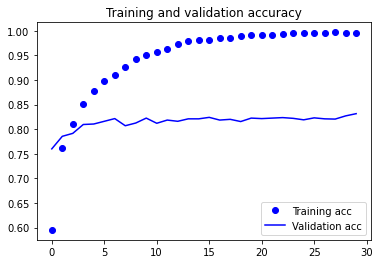

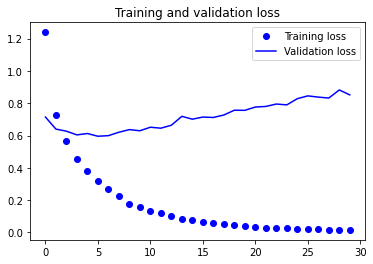

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the Model
model.save('pretrained_food_model_1.h5')

# Comments

My model reached a validation accuracy of about 80%. However, the model had already overfitted at around the 7th epoch. 

In [22]:
#Build the model (Feature extraction with data augmentation)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.summary()   #Had an error below so I ran again, so there is already non-trainable params

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_3 (Flatten)         (None, 51744)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               13246720  
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 17,519,006
Trainable params: 13,249,290
Non-trainable params: 4,269,716
_________________________________________________________________


In [24]:
conv_base.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_3 (Flatten)         (None, 51744)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               13246720  
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 17,519,006
Trainable params: 13,249,290
Non-trainable params: 4,269,716
_________________________________________________________________


In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [26]:
#Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=40,
      verbose=1)

Epoch 1/30
150/150 [==============================] - 91s 555ms/step - loss: 1.0869 - acc: 0.6299 - val_loss: 0.7700 - val_acc: 0.7515
Epoch 2/30
150/150 [==============================] - 85s 567ms/step - loss: 0.7615 - acc: 0.7447 - val_loss: 0.6917 - val_acc: 0.7750
Epoch 3/30
150/150 [==============================] - 85s 569ms/step - loss: 0.6887 - acc: 0.7696 - val_loss: 0.6792 - val_acc: 0.7770
Epoch 4/30
150/150 [==============================] - 85s 566ms/step - loss: 0.6511 - acc: 0.7797 - val_loss: 0.6858 - val_acc: 0.7855
Epoch 5/30
150/150 [==============================] - 84s 560ms/step - loss: 0.6213 - acc: 0.7932 - val_loss: 0.6282 - val_acc: 0.7860
Epoch 6/30
150/150 [==============================] - 81s 539ms/step - loss: 0.5920 - acc: 0.8007 - val_loss: 0.6066 - val_acc: 0.8060
Epoch 7/30
150/150 [==============================] - 81s 538ms/step - loss: 0.5696 - acc: 0.8096 - val_loss: 0.6672 - val_acc: 0.7850
Epoch 8/30
150/150 [==============================] - 8

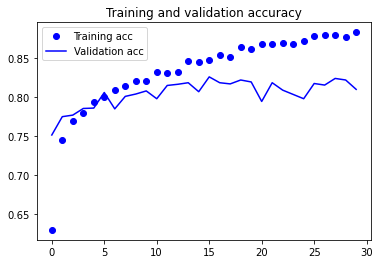

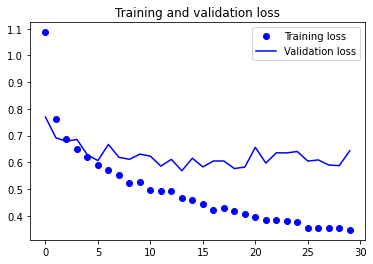

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
# Save the Model
model.save('pretrained_food_model_2.h5')

# Comments

My model reached a validation accuracy of around 80%, which was similar to model 1. My model still overfitted at around the 13th epoch. However, with data augmentation, it seemed that the model overfitted at a later epoch. 

In [18]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [19]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [20]:
# Build the Model   (fine-tuning my model)
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_2 (Flatten)         (None, 51744)             0         
                                                                 
 dense_13 (Dense)            (None, 512)               26493440  
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 256)              

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [22]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 108s 658ms/step - loss: 1.8920 - acc: 0.3672 - val_loss: 1.1847 - val_acc: 0.6965
Epoch 2/100
150/150 [==============================] - 85s 568ms/step - loss: 0.9566 - acc: 0.7311 - val_loss: 0.7247 - val_acc: 0.7770
Epoch 3/100
150/150 [==============================] - 85s 568ms/step - loss: 0.7230 - acc: 0.7696 - val_loss: 0.6420 - val_acc: 0.7920
Epoch 4/100
150/150 [==============================] - 86s 572ms/step - loss: 0.6404 - acc: 0.7877 - val_loss: 0.5856 - val_acc: 0.8070
Epoch 5/100
150/150 [==============================] - 85s 569ms/step - loss: 0.5917 - acc: 0.8061 - val_loss: 0.6367 - val_acc: 0.7935
Epoch 6/100
150/150 [==============================] - 86s 575ms/step - loss: 0.5504 - acc: 0.8171 - val_loss: 0.6145 - val_acc: 0.7955
Epoch 7/100
150/150 [==============================] - 86s 573ms/step - loss: 0.5425 - acc: 0.8193 - val_loss: 0.6030 - val_acc: 0.8020
Epoch 8/100
150/150 [==========================

Epoch 61/100
150/150 [==============================] - 86s 576ms/step - loss: 0.2437 - acc: 0.9149 - val_loss: 0.6668 - val_acc: 0.8130
Epoch 62/100
150/150 [==============================] - 86s 575ms/step - loss: 0.2435 - acc: 0.9157 - val_loss: 0.5870 - val_acc: 0.8315
Epoch 63/100
150/150 [==============================] - 86s 573ms/step - loss: 0.2447 - acc: 0.9151 - val_loss: 0.6193 - val_acc: 0.8260
Epoch 64/100
150/150 [==============================] - 86s 574ms/step - loss: 0.2336 - acc: 0.9187 - val_loss: 0.5988 - val_acc: 0.8300
Epoch 65/100
150/150 [==============================] - 87s 580ms/step - loss: 0.2322 - acc: 0.9184 - val_loss: 0.6055 - val_acc: 0.8260
Epoch 66/100
150/150 [==============================] - 86s 575ms/step - loss: 0.2301 - acc: 0.9231 - val_loss: 0.6464 - val_acc: 0.8175
Epoch 67/100
150/150 [==============================] - 88s 584ms/step - loss: 0.2391 - acc: 0.9188 - val_loss: 0.5942 - val_acc: 0.8315
Epoch 68/100
150/150 [===================

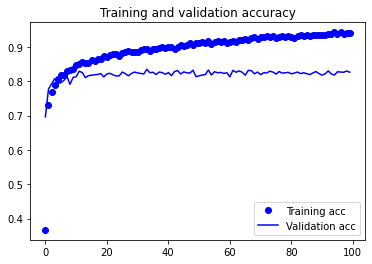

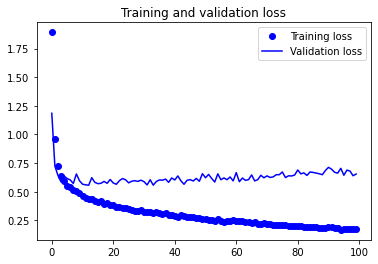

In [23]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.save('pretrained_food_model_3.h5')

# Comments 

My model managed to get an accuracy of about 80% similar to model 1 and 2. However, it seemed that the model had overfitted at around the 30th epoch. 

In [30]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [31]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [32]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_4 (Flatten)         (None, 51744)             0         
                                                                 
 dense_48 (Dense)            (None, 512)               26493440  
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dense_50 (Dense)            (None, 512)               262656    
                                                                 
 dense_51 (Dense)            (None, 512)               262656    
                                                                 
 dense_52 (Dense)            (None, 512)              

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [34]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 94s 559ms/step - loss: 1.6835 - acc: 0.5309 - val_loss: 0.8095 - val_acc: 0.8195
Epoch 2/100
150/150 [==============================] - 79s 529ms/step - loss: 0.5665 - acc: 0.8819 - val_loss: 0.6115 - val_acc: 0.8465
Epoch 3/100
150/150 [==============================] - 82s 548ms/step - loss: 0.4054 - acc: 0.9157 - val_loss: 0.6756 - val_acc: 0.8415
Epoch 4/100
150/150 [==============================] - 81s 540ms/step - loss: 0.3517 - acc: 0.9309 - val_loss: 0.7016 - val_acc: 0.8410
Epoch 5/100
150/150 [==============================] - 82s 548ms/step - loss: 0.3276 - acc: 0.9367 - val_loss: 0.6437 - val_acc: 0.8560
Epoch 6/100
150/150 [==============================] - 83s 553ms/step - loss: 0.3061 - acc: 0.9445 - val_loss: 0.6762 - val_acc: 0.8530
Epoch 7/100
150/150 [==============================] - 84s 562ms/step - loss: 0.2910 - acc: 0.9477 - val_loss: 0.6973 - val_acc: 0.8450
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 79s 525ms/step - loss: 0.1813 - acc: 0.9795 - val_loss: 0.8137 - val_acc: 0.8550
Epoch 62/100
150/150 [==============================] - 80s 532ms/step - loss: 0.1829 - acc: 0.9789 - val_loss: 0.7763 - val_acc: 0.8590
Epoch 63/100
150/150 [==============================] - 79s 525ms/step - loss: 0.1812 - acc: 0.9775 - val_loss: 0.7847 - val_acc: 0.8585
Epoch 64/100
150/150 [==============================] - 81s 537ms/step - loss: 0.1828 - acc: 0.9755 - val_loss: 0.8036 - val_acc: 0.8570
Epoch 65/100
150/150 [==============================] - 84s 559ms/step - loss: 0.1801 - acc: 0.9780 - val_loss: 0.7804 - val_acc: 0.8570
Epoch 66/100
150/150 [==============================] - 81s 543ms/step - loss: 0.1774 - acc: 0.9799 - val_loss: 0.7936 - val_acc: 0.8545
Epoch 67/100
150/150 [==============================] - 81s 537ms/step - loss: 0.1738 - acc: 0.9801 - val_loss: 0.8068 - val_acc: 0.8565
Epoch 68/100
150/150 [===================

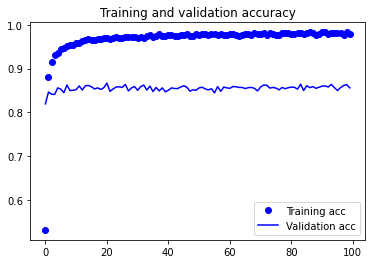

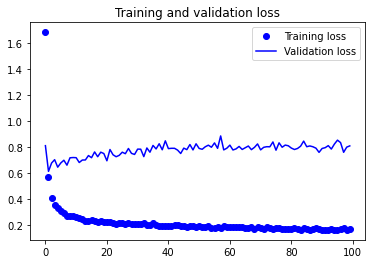

In [35]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
model.save('pretrained_food_model_4.h5')

# Comments

The model overfitted at around the 5th epoch, reaching a validation accuracy of 85%. However, the model’s training accuracy was 97%, a huge difference compared to the validation accuracy. 

In [18]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [19]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [20]:
# Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.00001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_2 (Flatten)         (None, 51744)             0         
                                                                 
 dense_18 (Dense)            (None, 512)               26493440  
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)              

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [22]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 113s 686ms/step - loss: 3.6338 - acc: 0.1412 - val_loss: 3.3697 - val_acc: 0.4510
Epoch 2/100
150/150 [==============================] - 88s 584ms/step - loss: 3.1215 - acc: 0.4027 - val_loss: 2.5334 - val_acc: 0.6465
Epoch 3/100
150/150 [==============================] - 88s 589ms/step - loss: 2.5635 - acc: 0.6015 - val_loss: 2.1894 - val_acc: 0.7090
Epoch 4/100
150/150 [==============================] - 86s 574ms/step - loss: 2.3213 - acc: 0.6620 - val_loss: 2.0818 - val_acc: 0.7375
Epoch 5/100
150/150 [==============================] - 88s 588ms/step - loss: 2.1771 - acc: 0.7028 - val_loss: 2.0035 - val_acc: 0.7665
Epoch 6/100
150/150 [==============================] - 86s 573ms/step - loss: 2.0991 - acc: 0.7236 - val_loss: 1.9700 - val_acc: 0.7760
Epoch 7/100
150/150 [==============================] - 84s 560ms/step - loss: 2.0394 - acc: 0.7441 - val_loss: 1.9255 - val_acc: 0.7850
Epoch 8/100
150/150 [==========================

Epoch 61/100
150/150 [==============================] - 80s 536ms/step - loss: 1.2667 - acc: 0.8885 - val_loss: 1.5431 - val_acc: 0.8330
Epoch 62/100
150/150 [==============================] - 80s 533ms/step - loss: 1.2606 - acc: 0.8907 - val_loss: 1.5262 - val_acc: 0.8365
Epoch 63/100
150/150 [==============================] - 81s 540ms/step - loss: 1.2570 - acc: 0.8933 - val_loss: 1.5668 - val_acc: 0.8300
Epoch 64/100
150/150 [==============================] - 80s 536ms/step - loss: 1.2380 - acc: 0.8967 - val_loss: 1.5417 - val_acc: 0.8325
Epoch 65/100
150/150 [==============================] - 81s 542ms/step - loss: 1.2448 - acc: 0.8911 - val_loss: 1.5541 - val_acc: 0.8280
Epoch 66/100
150/150 [==============================] - 79s 529ms/step - loss: 1.2329 - acc: 0.8940 - val_loss: 1.5316 - val_acc: 0.8365
Epoch 67/100
150/150 [==============================] - 80s 531ms/step - loss: 1.2275 - acc: 0.8943 - val_loss: 1.5447 - val_acc: 0.8265
Epoch 68/100
150/150 [===================

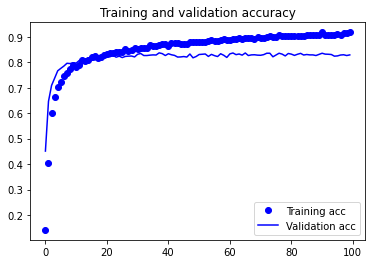

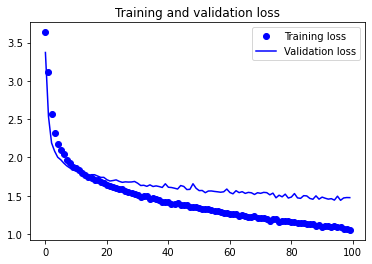

In [23]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.save('pretrained_food_model_5.h5')

# Comments

It seemed that my model is underfitted now. The model managed to reach a validation accuracy of about 80%.

In [4]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [5]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [6]:
#Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 51744)             0         
                                                                 
 dense (Dense)               (None, 512)               26493440  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               2

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [8]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 103s 563ms/step - loss: 2.0406 - acc: 0.3968 - val_loss: 1.3394 - val_acc: 0.6635
Epoch 2/100
150/150 [==============================] - 77s 511ms/step - loss: 1.2105 - acc: 0.6625 - val_loss: 0.9817 - val_acc: 0.7250
Epoch 3/100
150/150 [==============================] - 76s 507ms/step - loss: 1.0230 - acc: 0.7103 - val_loss: 0.8958 - val_acc: 0.7575
Epoch 4/100
150/150 [==============================] - 76s 505ms/step - loss: 0.9275 - acc: 0.7407 - val_loss: 0.8542 - val_acc: 0.7655
Epoch 5/100
150/150 [==============================] - 77s 511ms/step - loss: 0.8793 - acc: 0.7644 - val_loss: 0.8070 - val_acc: 0.7830
Epoch 6/100
150/150 [==============================] - 81s 543ms/step - loss: 0.8413 - acc: 0.7740 - val_loss: 0.8263 - val_acc: 0.7760
Epoch 7/100
150/150 [==============================] - 77s 509ms/step - loss: 0.8151 - acc: 0.7827 - val_loss: 0.7820 - val_acc: 0.7940
Epoch 8/100
150/150 [==========================

Epoch 61/100
150/150 [==============================] - 76s 505ms/step - loss: 0.4372 - acc: 0.9024 - val_loss: 0.7305 - val_acc: 0.8210
Epoch 62/100
150/150 [==============================] - 76s 505ms/step - loss: 0.4528 - acc: 0.8960 - val_loss: 0.7055 - val_acc: 0.8305
Epoch 63/100
150/150 [==============================] - 76s 506ms/step - loss: 0.4412 - acc: 0.8969 - val_loss: 0.7378 - val_acc: 0.8240
Epoch 64/100
150/150 [==============================] - 76s 505ms/step - loss: 0.4442 - acc: 0.8981 - val_loss: 0.7472 - val_acc: 0.8140
Epoch 65/100
150/150 [==============================] - 76s 505ms/step - loss: 0.4313 - acc: 0.9005 - val_loss: 0.7370 - val_acc: 0.8190
Epoch 66/100
150/150 [==============================] - 76s 505ms/step - loss: 0.4313 - acc: 0.8972 - val_loss: 0.7693 - val_acc: 0.8135
Epoch 67/100
150/150 [==============================] - 76s 505ms/step - loss: 0.4241 - acc: 0.9025 - val_loss: 0.7739 - val_acc: 0.8145
Epoch 68/100
150/150 [===================

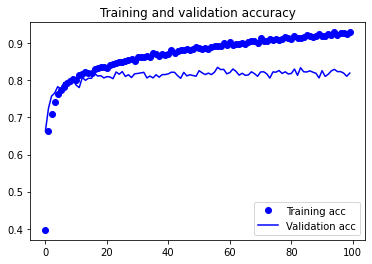

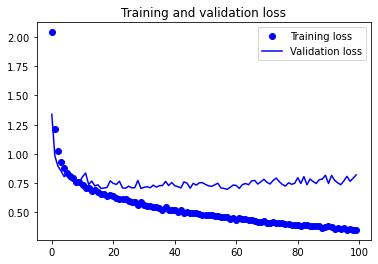

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save('pretrained_food_model_6.h5')

# Comments

My model overfitted at around the 20th epoch. My model’s validation is still at 80%.

In [4]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [5]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [6]:
#Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.000001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 51744)             0         
                                                                 
 dense (Dense)               (None, 512)               26493440  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               2

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [8]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 95s 553ms/step - loss: 2.0091 - acc: 0.4279 - val_loss: 1.3023 - val_acc: 0.6530
Epoch 2/100
150/150 [==============================] - 79s 527ms/step - loss: 1.1809 - acc: 0.6825 - val_loss: 1.0347 - val_acc: 0.7080
Epoch 3/100
150/150 [==============================] - 80s 530ms/step - loss: 1.0034 - acc: 0.7316 - val_loss: 0.9019 - val_acc: 0.7565
Epoch 4/100
150/150 [==============================] - 80s 532ms/step - loss: 0.9379 - acc: 0.7513 - val_loss: 0.9077 - val_acc: 0.7585
Epoch 5/100
150/150 [==============================] - 80s 530ms/step - loss: 0.8844 - acc: 0.7631 - val_loss: 0.8563 - val_acc: 0.7760
Epoch 6/100
150/150 [==============================] - 80s 531ms/step - loss: 0.8424 - acc: 0.7852 - val_loss: 0.8043 - val_acc: 0.7925
Epoch 7/100
150/150 [==============================] - 80s 533ms/step - loss: 0.8216 - acc: 0.7891 - val_loss: 0.8141 - val_acc: 0.7875
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 79s 529ms/step - loss: 0.4633 - acc: 0.8953 - val_loss: 0.7486 - val_acc: 0.8300
Epoch 62/100
150/150 [==============================] - 80s 531ms/step - loss: 0.4531 - acc: 0.8983 - val_loss: 0.7258 - val_acc: 0.8345
Epoch 63/100
150/150 [==============================] - 79s 530ms/step - loss: 0.4581 - acc: 0.8987 - val_loss: 0.7641 - val_acc: 0.8235
Epoch 64/100
150/150 [==============================] - 80s 533ms/step - loss: 0.4508 - acc: 0.8969 - val_loss: 0.7492 - val_acc: 0.8295
Epoch 65/100
150/150 [==============================] - 80s 532ms/step - loss: 0.4478 - acc: 0.9043 - val_loss: 0.7455 - val_acc: 0.8270
Epoch 66/100
150/150 [==============================] - 80s 530ms/step - loss: 0.4420 - acc: 0.9072 - val_loss: 0.7675 - val_acc: 0.8245
Epoch 67/100
150/150 [==============================] - 80s 530ms/step - loss: 0.4396 - acc: 0.9067 - val_loss: 0.7615 - val_acc: 0.8270
Epoch 68/100
150/150 [===================

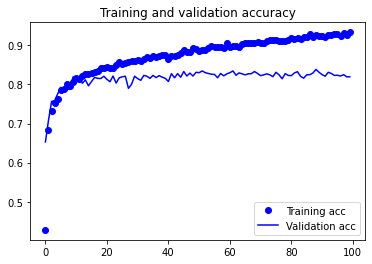

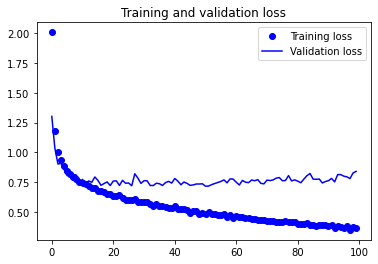

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save('pretrained_food_model_7.h5')

# Comments

The overall trend of the model increased at around 50 to 60 epochs. As such, it is safe to say that the model overfitted around the 55th epoch. The validation accuracy remains at 80%. 

In [9]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [10]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [11]:
#Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 51744)             0         
                                                                 
 dense (Dense)               (None, 512)               26493440  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               2

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [13]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 97s 546ms/step - loss: 2.0132 - acc: 0.4279 - val_loss: 1.2847 - val_acc: 0.6835
Epoch 2/100
150/150 [==============================] - 77s 514ms/step - loss: 1.1853 - acc: 0.6883 - val_loss: 1.0183 - val_acc: 0.7175
Epoch 3/100
150/150 [==============================] - 78s 516ms/step - loss: 1.0087 - acc: 0.7319 - val_loss: 0.8900 - val_acc: 0.7715
Epoch 4/100
150/150 [==============================] - 77s 514ms/step - loss: 0.9262 - acc: 0.7549 - val_loss: 0.8675 - val_acc: 0.7730
Epoch 5/100
150/150 [==============================] - 78s 517ms/step - loss: 0.8831 - acc: 0.7693 - val_loss: 0.8502 - val_acc: 0.7765
Epoch 6/100
150/150 [==============================] - 77s 515ms/step - loss: 0.8522 - acc: 0.7820 - val_loss: 0.8278 - val_acc: 0.7900
Epoch 7/100
150/150 [==============================] - 77s 515ms/step - loss: 0.8277 - acc: 0.7809 - val_loss: 0.8477 - val_acc: 0.7770
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 77s 516ms/step - loss: 0.4583 - acc: 0.9015 - val_loss: 0.7621 - val_acc: 0.8145
Epoch 62/100
150/150 [==============================] - 77s 514ms/step - loss: 0.4623 - acc: 0.9003 - val_loss: 0.7487 - val_acc: 0.8260
Epoch 63/100
150/150 [==============================] - 77s 514ms/step - loss: 0.4617 - acc: 0.8989 - val_loss: 0.7564 - val_acc: 0.8250
Epoch 64/100
150/150 [==============================] - 77s 515ms/step - loss: 0.4609 - acc: 0.9049 - val_loss: 0.7317 - val_acc: 0.8275
Epoch 65/100
150/150 [==============================] - 77s 514ms/step - loss: 0.4613 - acc: 0.8961 - val_loss: 0.7457 - val_acc: 0.8310
Epoch 66/100
150/150 [==============================] - 77s 515ms/step - loss: 0.4553 - acc: 0.9009 - val_loss: 0.7489 - val_acc: 0.8295
Epoch 67/100
150/150 [==============================] - 77s 516ms/step - loss: 0.4521 - acc: 0.9005 - val_loss: 0.7457 - val_acc: 0.8255
Epoch 68/100
150/150 [===================

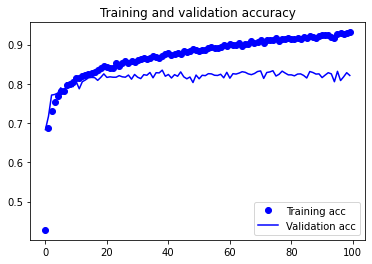

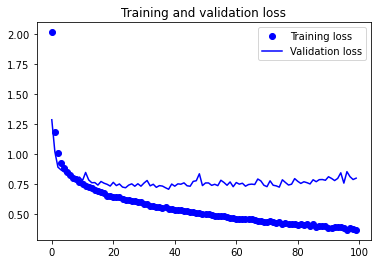

In [14]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.save('pretrained_food_model_8.h5')

# Comments

The model overfitted at around the 40th epoch. Unexpectedly, the validation accuracy was still around 80%. 

In [4]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [5]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [6]:
#Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 51744)             0         
                                                                 
 dense (Dense)               (None, 512)               26493440  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               1

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [8]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 98s 572ms/step - loss: 1.6737 - acc: 0.5480 - val_loss: 1.0420 - val_acc: 0.7210
Epoch 2/100
150/150 [==============================] - 83s 553ms/step - loss: 1.0426 - acc: 0.7156 - val_loss: 0.8905 - val_acc: 0.7640
Epoch 3/100
150/150 [==============================] - 85s 564ms/step - loss: 0.9212 - acc: 0.7496 - val_loss: 0.8797 - val_acc: 0.7615
Epoch 4/100
150/150 [==============================] - 84s 561ms/step - loss: 0.8619 - acc: 0.7693 - val_loss: 0.8100 - val_acc: 0.7850
Epoch 5/100
150/150 [==============================] - 84s 561ms/step - loss: 0.8271 - acc: 0.7809 - val_loss: 0.8200 - val_acc: 0.7830
Epoch 6/100
150/150 [==============================] - 84s 559ms/step - loss: 0.7914 - acc: 0.7955 - val_loss: 0.8060 - val_acc: 0.7860
Epoch 7/100
150/150 [==============================] - 85s 569ms/step - loss: 0.7784 - acc: 0.7976 - val_loss: 0.7776 - val_acc: 0.7990
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 91s 604ms/step - loss: 0.4264 - acc: 0.9079 - val_loss: 0.7461 - val_acc: 0.8255
Epoch 62/100
150/150 [==============================] - 89s 594ms/step - loss: 0.4201 - acc: 0.9120 - val_loss: 0.7371 - val_acc: 0.8165
Epoch 63/100
150/150 [==============================] - 90s 603ms/step - loss: 0.4178 - acc: 0.9117 - val_loss: 0.7409 - val_acc: 0.8210
Epoch 64/100
150/150 [==============================] - 90s 602ms/step - loss: 0.4136 - acc: 0.9152 - val_loss: 0.7370 - val_acc: 0.8280
Epoch 65/100
150/150 [==============================] - 91s 606ms/step - loss: 0.4147 - acc: 0.9088 - val_loss: 0.7860 - val_acc: 0.8195
Epoch 66/100
150/150 [==============================] - 82s 548ms/step - loss: 0.4175 - acc: 0.9131 - val_loss: 0.7389 - val_acc: 0.8220
Epoch 67/100
150/150 [==============================] - 79s 530ms/step - loss: 0.4091 - acc: 0.9141 - val_loss: 0.7328 - val_acc: 0.8240
Epoch 68/100
150/150 [===================

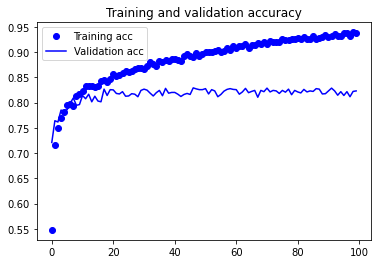

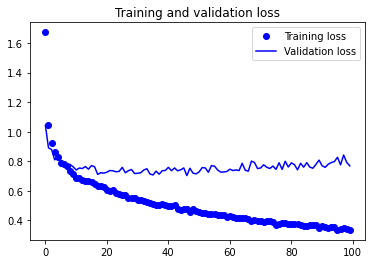

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save('pretrained_food_model_9.h5')

# Comments

My model managed to reach an accuracy of 82.5%. However, it seemed that the model overfitted earlier on at around the 20th epoch, as the overall trend of the validation loss seems to be increasing from the 20th epoch onwards. 

In [18]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [19]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [20]:
#Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_2 (Flatten)         (None, 51744)             0         
                                                                 
 dense_14 (Dense)            (None, 512)               26493440  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 512)              

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [22]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 88s 530ms/step - loss: 2.2043 - acc: 0.3272 - val_loss: 1.4911 - val_acc: 0.6100
Epoch 2/100
150/150 [==============================] - 78s 518ms/step - loss: 1.4810 - acc: 0.5899 - val_loss: 1.0103 - val_acc: 0.7320
Epoch 3/100
150/150 [==============================] - 78s 518ms/step - loss: 1.1545 - acc: 0.6796 - val_loss: 0.8970 - val_acc: 0.7645
Epoch 4/100
150/150 [==============================] - 77s 516ms/step - loss: 1.0267 - acc: 0.7220 - val_loss: 0.8628 - val_acc: 0.7710
Epoch 5/100
150/150 [==============================] - 78s 517ms/step - loss: 0.9732 - acc: 0.7344 - val_loss: 0.8384 - val_acc: 0.7815
Epoch 6/100
150/150 [==============================] - 77s 515ms/step - loss: 0.9223 - acc: 0.7476 - val_loss: 0.8062 - val_acc: 0.7930
Epoch 7/100
150/150 [==============================] - 77s 516ms/step - loss: 0.9028 - acc: 0.7551 - val_loss: 0.7913 - val_acc: 0.7995
Epoch 8/100
150/150 [===========================

Epoch 61/100
150/150 [==============================] - 77s 513ms/step - loss: 0.5686 - acc: 0.8680 - val_loss: 0.7361 - val_acc: 0.8295
Epoch 62/100
150/150 [==============================] - 77s 513ms/step - loss: 0.5392 - acc: 0.8768 - val_loss: 0.7413 - val_acc: 0.8345
Epoch 63/100
150/150 [==============================] - 77s 515ms/step - loss: 0.5620 - acc: 0.8681 - val_loss: 0.7661 - val_acc: 0.8255
Epoch 64/100
150/150 [==============================] - 78s 518ms/step - loss: 0.5496 - acc: 0.8685 - val_loss: 0.7495 - val_acc: 0.8320
Epoch 65/100
150/150 [==============================] - 77s 514ms/step - loss: 0.5419 - acc: 0.8760 - val_loss: 0.7662 - val_acc: 0.8270
Epoch 66/100
150/150 [==============================] - 77s 513ms/step - loss: 0.5484 - acc: 0.8732 - val_loss: 0.7405 - val_acc: 0.8340
Epoch 67/100
150/150 [==============================] - 77s 514ms/step - loss: 0.5464 - acc: 0.8700 - val_loss: 0.7465 - val_acc: 0.8325
Epoch 68/100
150/150 [===================

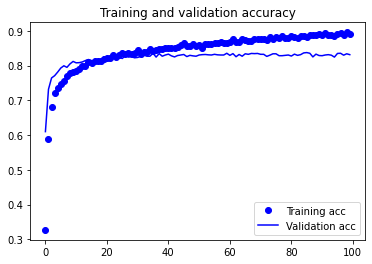

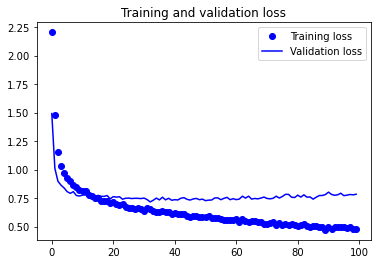

In [23]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.save('pretrained_food_model_10.h5')

# Comments

Although the overall increase is not so obvious, it seem that the model overfitted at around the 40th epoch, with the validation accuracy at around 82%. 

In [32]:
conv_base.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

Number of layers in the base model:  769


In [33]:
# Fine-tune from this layer onwards
fine_tune_at = 739

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

In [34]:
#Build the Model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.000001, l2=0.000001)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 flatten_4 (Flatten)         (None, 51744)             0         
                                                                 
 dense_28 (Dense)            (None, 512)               26493440  
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 512)              

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [36]:
# Train the Model
history = model.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
150/150 [==============================] - 111s 671ms/step - loss: 2.4453 - acc: 0.1621 - val_loss: 2.2137 - val_acc: 0.5285
Epoch 2/100
150/150 [==============================] - 90s 602ms/step - loss: 2.2282 - acc: 0.2909 - val_loss: 1.7177 - val_acc: 0.6000
Epoch 3/100
150/150 [==============================] - 91s 604ms/step - loss: 1.9155 - acc: 0.4087 - val_loss: 1.3248 - val_acc: 0.6650
Epoch 4/100
150/150 [==============================] - 94s 629ms/step - loss: 1.6521 - acc: 0.4968 - val_loss: 1.0869 - val_acc: 0.7245
Epoch 5/100
150/150 [==============================] - 90s 601ms/step - loss: 1.4673 - acc: 0.5523 - val_loss: 0.9864 - val_acc: 0.7545
Epoch 6/100
150/150 [==============================] - 90s 601ms/step - loss: 1.3568 - acc: 0.5949 - val_loss: 0.9130 - val_acc: 0.7710
Epoch 7/100
150/150 [==============================] - 91s 607ms/step - loss: 1.2580 - acc: 0.6272 - val_loss: 0.8853 - val_acc: 0.7725
Epoch 8/100
150/150 [==========================

Epoch 61/100
150/150 [==============================] - 79s 527ms/step - loss: 0.6634 - acc: 0.8365 - val_loss: 0.7441 - val_acc: 0.8355
Epoch 62/100
150/150 [==============================] - 79s 529ms/step - loss: 0.6497 - acc: 0.8448 - val_loss: 0.7450 - val_acc: 0.8395
Epoch 63/100
150/150 [==============================] - 80s 536ms/step - loss: 0.6404 - acc: 0.8448 - val_loss: 0.7558 - val_acc: 0.8340
Epoch 64/100
150/150 [==============================] - 80s 530ms/step - loss: 0.6378 - acc: 0.8468 - val_loss: 0.7452 - val_acc: 0.8375
Epoch 65/100
150/150 [==============================] - 80s 531ms/step - loss: 0.6338 - acc: 0.8457 - val_loss: 0.7493 - val_acc: 0.8375
Epoch 66/100
150/150 [==============================] - 79s 526ms/step - loss: 0.6477 - acc: 0.8428 - val_loss: 0.7382 - val_acc: 0.8420
Epoch 67/100
150/150 [==============================] - 79s 527ms/step - loss: 0.6204 - acc: 0.8504 - val_loss: 0.7412 - val_acc: 0.8405
Epoch 68/100
150/150 [===================

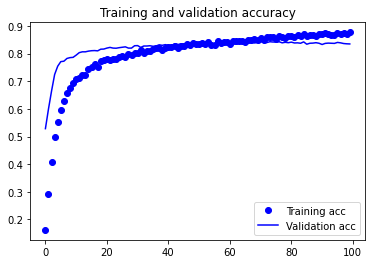

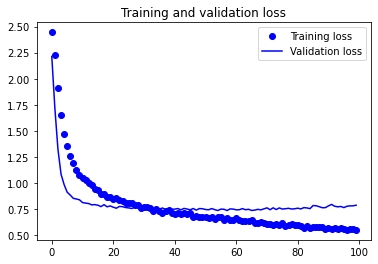

In [37]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
model.save('pretrained_food_model_11.h5')

# Comments

My model overfitted at around the 83rd epoch. It would be safe to say that my model is a good fit model as it is in the optimal range. My model's validation accuracy is around 82%.

## Step 3 – Evaluate the Developed Models using Testing Images

In [44]:
# Model #1
model1 = keras.models.load_model('food_model_5.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model1.evaluate(test_generator, steps=10)
print('test acc:', test_acc)


Found 500 images belonging to 10 classes.
10/10 [==============================] - 2s 146ms/step - loss: 1.3184 - acc: 0.6080
test acc: 0.6079999804496765


# Comments

Valdiation accuracy: 65%

As you can see, comparing the testing accuracy to my validation accuracy, my train from scratch model did worse during testing. 

In [45]:
# Model #2
model2 = keras.models.load_model('pretrained_food_model_11.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=50,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate(test_generator, steps=10)
print('test acc:', test_acc)



Found 500 images belonging to 10 classes.
10/10 [==============================] - 4s 147ms/step - loss: 0.6663 - acc: 0.8620
test acc: 0.8619999885559082


# Comments

Validation accuracy: 82%

As you can see, comparing the testing accuracy to my validation accuracy, my pretrained model performed better during testing. 

In [46]:
# Save the best model
model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [47]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [48]:
# Load the food list (in alphabetical order)
with open('35.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['breakfast_burrito', 'bruschetta', 'chocolate_cake', 'churros', 'eggs_benedict', 'fish_and_chips', 'onion_rings', 'panna_cotta', 'ramen', 'ravioli']


In [49]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

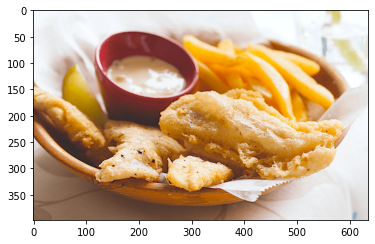

The prediction is:  fish_and_chips 

    breakfast_burrito  bruschetta  chocolate_cake   churros  eggs_benedict  \
0           0.003124    0.000585        0.000148  0.005187       0.004799   

   fish_and_chips  onion_rings  panna_cotta     ramen   ravioli  
0        0.502964     0.478385     0.000181  0.002297  0.002329  


In [51]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
#Fish and chips
img = 'fish and chips.png' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

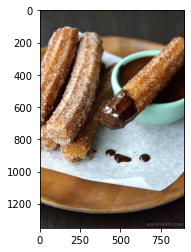

The prediction is:  churros 

    breakfast_burrito    bruschetta  chocolate_cake  churros  eggs_benedict  \
0       1.152671e-11  6.753359e-11    6.124233e-08      1.0   8.481197e-15   

   fish_and_chips   onion_rings   panna_cotta         ramen       ravioli  
0    2.814007e-10  8.621403e-10  1.088667e-09  1.476412e-13  8.691992e-13  


In [54]:
# Make prediction for the image you downloaded from internet
#Churros
import matplotlib.pyplot as plt
img = 'churros.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

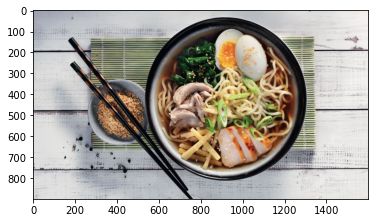

The prediction is:  ramen 

    breakfast_burrito    bruschetta  chocolate_cake       churros  \
0       8.690217e-07  8.118494e-07    4.926542e-08  1.286153e-07   

   eggs_benedict  fish_and_chips   onion_rings   panna_cotta     ramen  \
0   3.762317e-09    6.410271e-07  4.495806e-09  6.869226e-09  0.999995   

    ravioli  
0  0.000003  


In [56]:
# Make prediction for the image you downloaded from internet
#Ramen
import matplotlib.pyplot as plt
img = 'ramen.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

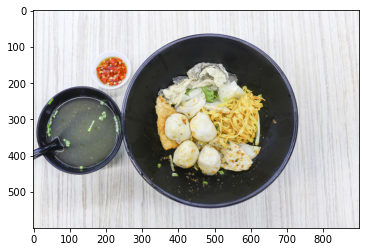

The prediction is:  ramen 

    breakfast_burrito  bruschetta  chocolate_cake   churros  eggs_benedict  \
0           0.020003     0.00122        0.003884  0.012936       0.000402   

   fish_and_chips  onion_rings  panna_cotta     ramen   ravioli  
0        0.004365     0.000107     0.003745  0.951078  0.002259  


In [57]:
# Make prediction for the image you downloaded from internet    
#fishball noodles in a black bowl image to test the model
import matplotlib.pyplot as plt
img = 'fishball noodle.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)